#### Chapter 02. Supervised Learning 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style='whitegrid',  palette="pastel" )

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
#### A.Muller가 만든 패키지 
!pip install mglearn

#### <font color="blue"> 2.3.1 Data_sets making </font>
- <font color="blue"> 실습에 사용할 4개의 데이터셋을 만든다 </font>
- <font color="blue">  forge, wave는 mglearn 패키지를 사용하고, breast_cancer와 boston_housing은 sklearn 내장을 불러온다. </font>

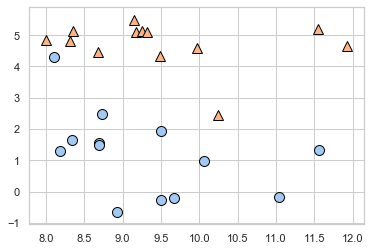

In [25]:
#### 1) forge 데이터  
import mglearn
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

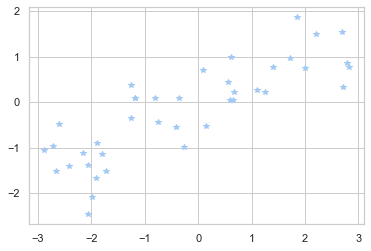

In [4]:
#### 2) wave 데이터 
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y, '*')

In [5]:
#### 3) cancer 데이터 (사이킷런 내장 데이터셋)
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
cancer['data'].shape

(569, 30)

In [7]:
print(cancer.target_names)
np.bincount(cancer.target)    #### target이 binary이므로 bincount를 사용했다. 

['malignant' 'benign']


array([212, 357], dtype=int64)

- <font color="blue">breast_cancer : 위스콘신 유방암 임상 데이터  </font>
- <font color="blue">569 x 50개의 데이터 ~ malignant(악성) 212개, benign(양성) 357개 </font>
- <font color="blue">data는 임상수치, target(target_names)는 0(악성) / 1(양성), feature_names는 종양의 크기/위치 등 특징을 기술한 것 </font>

In [8]:
#### 4) boston housing 데이터 (사이킷런 내장 데이터셋)
from sklearn.datasets import load_boston
boston = load_boston() 
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [9]:
boston['data'].shape

(506, 13)

In [10]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
X, y = mglearn.datasets.load_extended_boston()
print(X.shape)
print(y.shape)

(506, 104)
(506,)


- <font color="blue">보스턴 주택가격 데이터 <font color="blue">
- <font color="blue">506 x 13개, 해당지역의 특징(feature_names)에 따른 평가수치를 기록한 것<font color="blue">
- <font color="blue">feature_names는 우범지역/노후도/세금수준 등이며,  target은 주택가격을 나타냄 <font color="blue">
- <font color="blue">extended_boston은 Muller가 feature engineering을 통해 확장시켜 놓은 데이터셋임 <font color="blue">

#### <font color="blue"> 2.3.2 kNN model </font>

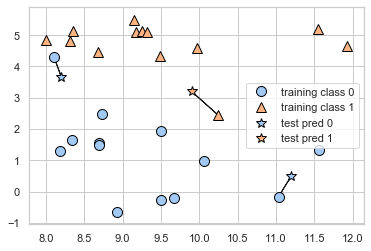

In [26]:
## forge 데이터에 대한 n = 1의 분류 
mglearn.plots.plot_knn_classification(n_neighbors = 1)

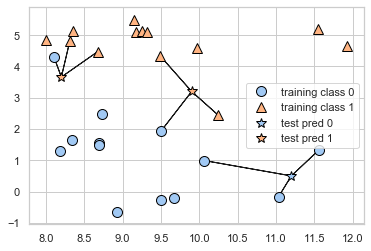

In [27]:
## n = 3으로 분류할 때 
mglearn.plots.plot_knn_classification(n_neighbors = 3)

In [28]:
## scikit-learn을 사용한 knn 연습 
## 1) train/test dataset 만들기 

from sklearn.model_selection import train_test_split 
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [16]:
## 2) KNeighborsClassifier import
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [17]:
## 3) model fitting 
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [18]:
## 4) predit by model 
print(X_test)
print("--------------------------------------------------")
clf.predict(X_test)

[[11.54155807  5.21116083]
 [10.06393839  0.99078055]
 [ 9.49123469  4.33224792]
 [ 8.18378052  1.29564214]
 [ 8.30988863  4.80623966]
 [10.24028948  2.45544401]
 [ 8.34468785  1.63824349]]
--------------------------------------------------


array([1, 0, 1, 0, 1, 0, 0])

In [19]:
## 5) validtion score 
clf.score(X_test, y_test)

0.8571428571428571

In [20]:
######### KNeighborsClassifier analysis 

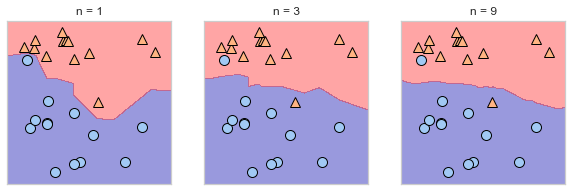

In [21]:
## n = 1, 3, 9인 경우 비교 
## n이 많아질수록 overfitting 된다. 
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes) : 
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("n = {}".format(n_neighbors))

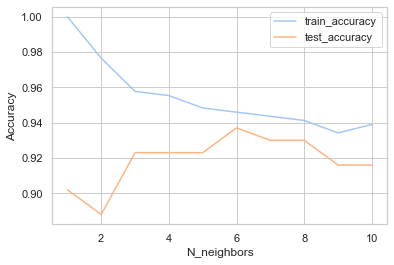

In [22]:
#### 유방암 데이터로 knn 연습 

## 1) data loading 
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()

## 2) train, test dataset split 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

train_accuracy = []
test_accuracy = [] 
neighbors_settings = range(1, 11)  ## n값을 1~11까지 번걸아 적용 

## 3) modeling 
for n_neighbors in neighbors_settings : 
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)

## 4) accuracy 저장 
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
## 5) visuallization 
plt.plot(neighbors_settings, train_accuracy, label = 'train_accuracy' )
plt.plot(neighbors_settings, test_accuracy, label = 'test_accuracy' )
plt.xlabel('N_neighbors')
plt.ylabel('Accuracy')
plt.legend()

## ---> under fitting과 overfitting의 절충 : n=6이 최적의 모델이라고 할 수 있다. 

In [30]:
######### kNN Regression 
######### 1) mglearn을 사용한 n=1, 3일때의 예측 

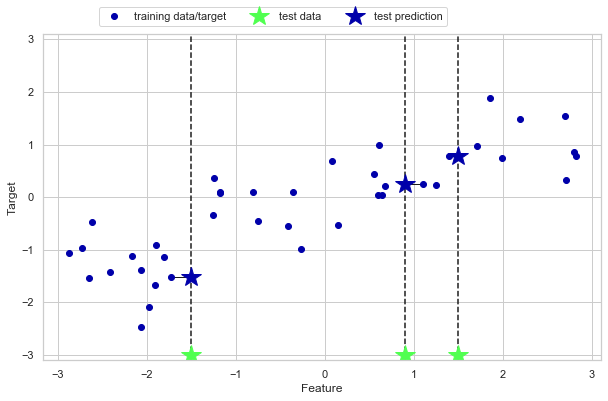

In [39]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

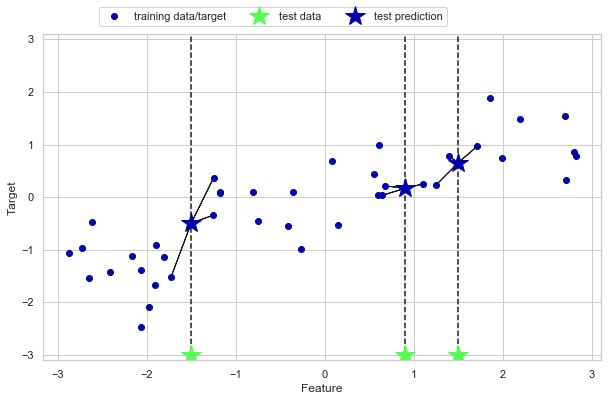

In [40]:
mglearn.plots.plot_knn_regression(n_neighbors = 3)

In [42]:
######### 2) scikit-learn을 사용한 kNN regression(최근접 이웃 회귀) 

In [46]:
from sklearn.neighbors import KNeighborsRegressor 
X, y = mglearn.datasets.make_wave(n_samples = 40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
reg = KNeighborsRegressor(n_neighbors = 3)
reg.fit(X_train, y_train)

reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [47]:
#### score : R^2 
reg.score(X_test, y_test)

0.8344172446249604

In [48]:
######### 3) KNeighborsRegressor practice 

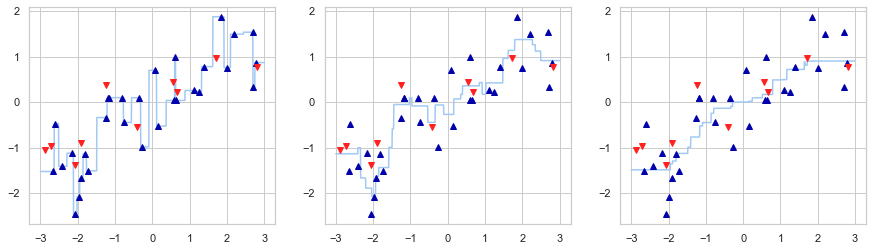

In [57]:
fig, axes = plt.subplots(1, 3, figsize = (15,4))

#### -3 ~ +3 사이에 1천개의 데이터 생성 
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

#### n = 1, 3, 9인 경우 예측 
for n_neighbors, ax in zip([1,3,9], axes) : 
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0))
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1))

#### - <font color="blue"> knn 모델은 보통 유클라디안 거리방식을 사용하며, n의 갯수 설정이 중요하다. </font>
#### - <font color="blue"> 모델을 이해하기는 쉬우나, 느리고 다수의 특성을 처리하기 어렵다. </font>
#### - <font color="blue"> 특히 수백개 이상 많은 특성을 가진 데이터나, 특성값이 0이 많은 경우 잘 작동하지 않는다. </font>